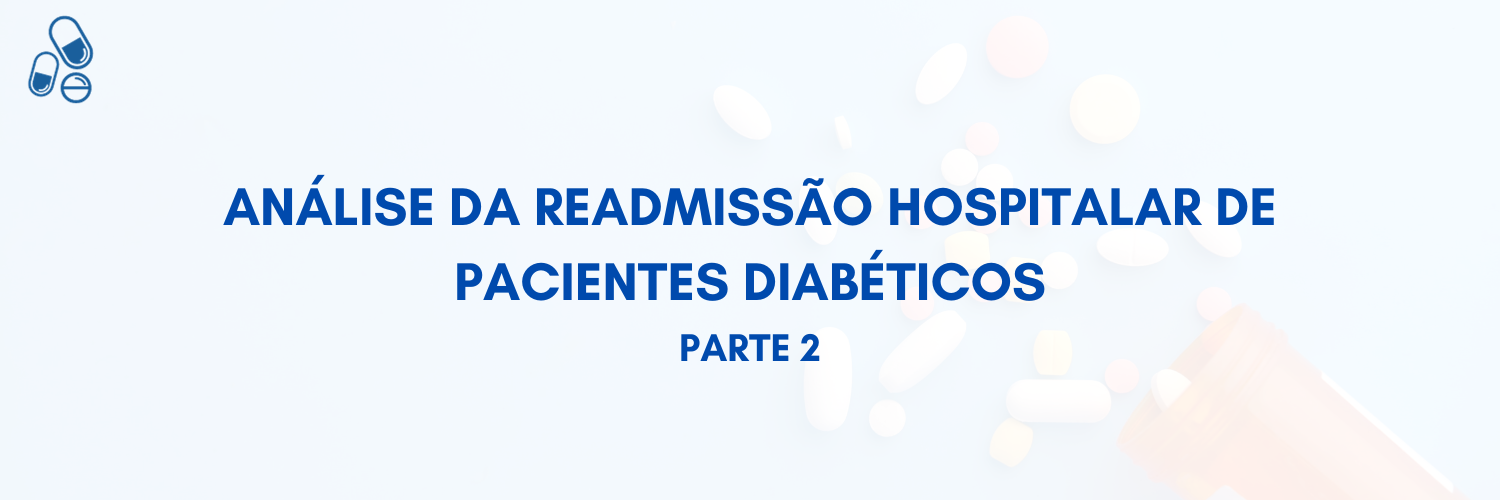

## Instalando e Carregando os Pacotes

In [ ]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python:', python_version())

Versão da Linguagem Python: 3.10.12


In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## Análise Exploratória

In [ ]:
# Carregando o dataset
dados = pd.read_csv("/content/dados_parte1.csv")

In [ ]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
0,149190,55629189,Caucasian,0,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,...,0,9,-99,-99,1,1,1,1,1,1
1,64410,86047875,AfricanAmerican,0,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,...,1,6,-99,-99,0,1,0,1,0,1
2,500364,82442376,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,...,0,7,-99,-99,1,1,0,3,1,1
3,16680,42519267,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,...,0,5,-99,-99,1,1,0,1,0,2
4,35754,82637451,Caucasian,1,[50-60),Outro,Casa,Outro,3,31,...,0,9,-99,-99,0,1,1,3,0,1


In [ ]:
print("Temos", dados.shape[0], "linhas e", dados.shape[1], "colunas.")

Temos 68629 linhas e 24 colunas.


In [ ]:
# Resumo de informações do conjunto de dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68629 entries, 0 to 68628
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              68629 non-null  int64 
 1   patient_nbr               68629 non-null  int64 
 2   race                      68629 non-null  object
 3   gender                    68629 non-null  int64 
 4   age                       68629 non-null  object
 5   admission_type_id         68629 non-null  object
 6   discharge_disposition_id  68629 non-null  object
 7   admission_source_id       68629 non-null  object
 8   time_in_hospital          68629 non-null  int64 
 9   num_lab_procedures        68629 non-null  int64 
 10  num_procedures            68629 non-null  int64 
 11  num_medications           68629 non-null  int64 
 12  number_outpatient         68629 non-null  int64 
 13  number_emergency          68629 non-null  int64 
 14  number_inpatient      

#### Total de Medicamentos Consumidos Por Faixa Etária

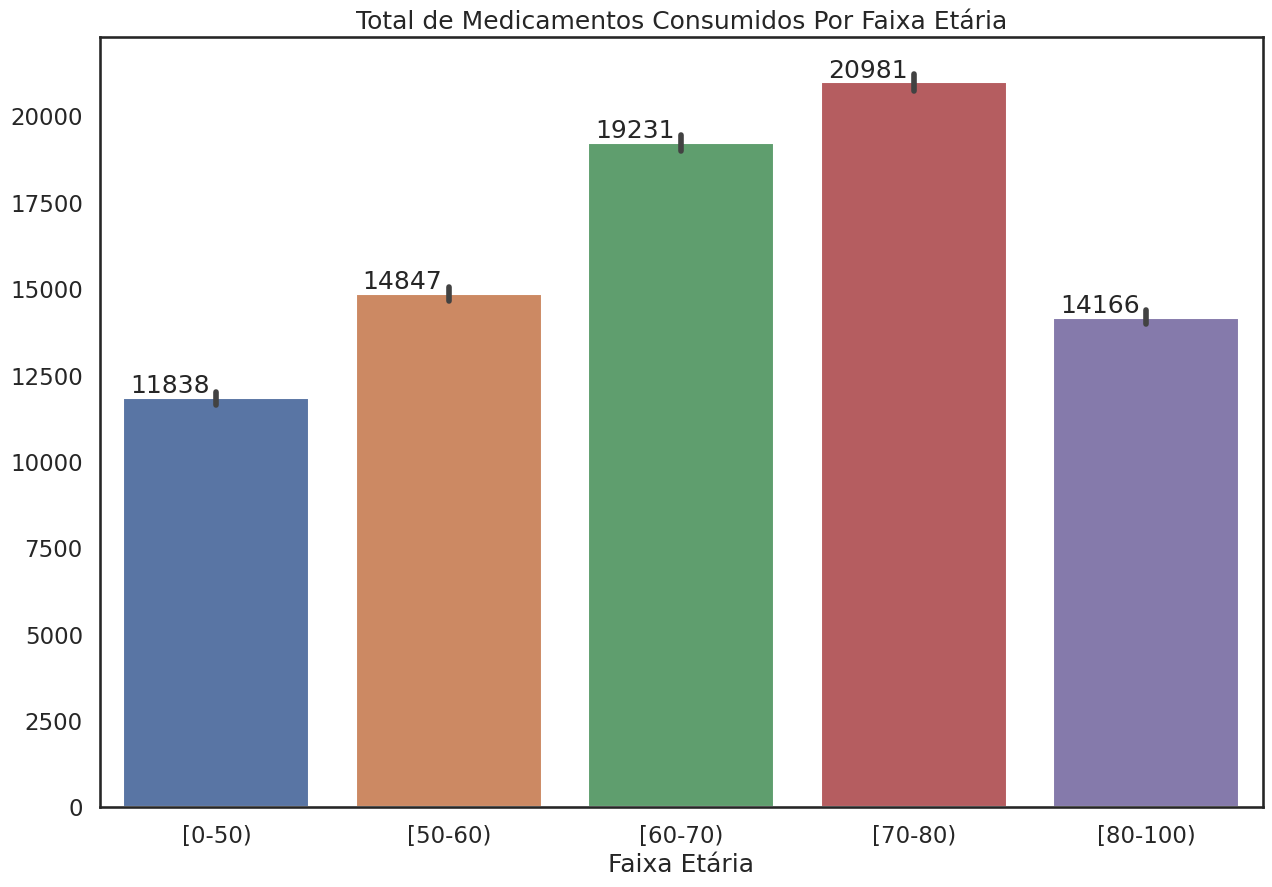

In [ ]:
figx = sns.barplot(x = 'age', y = 'num_med', estimator = np.sum, data = dados)

figx.figure.set_size_inches(15,10)

# totais em cada uma das barras como labels
for p in figx.patches:
    figx.annotate('{:.0f}'.format(p.get_height()),
                  (p.get_x() + 0.2, p.get_height()),
                  ha = 'center',
                  va = 'bottom')

plt.xlabel("Faixa Etária")
plt.ylabel("")
plt.title("Total de Medicamentos Consumidos Por Faixa Etária")

plt.show()

> A faixa etária de pacientes entre 70-80 é a que mais consome medicamentos.

#### Total de Readmissões de Pacientes Diabéticos Por Gênero

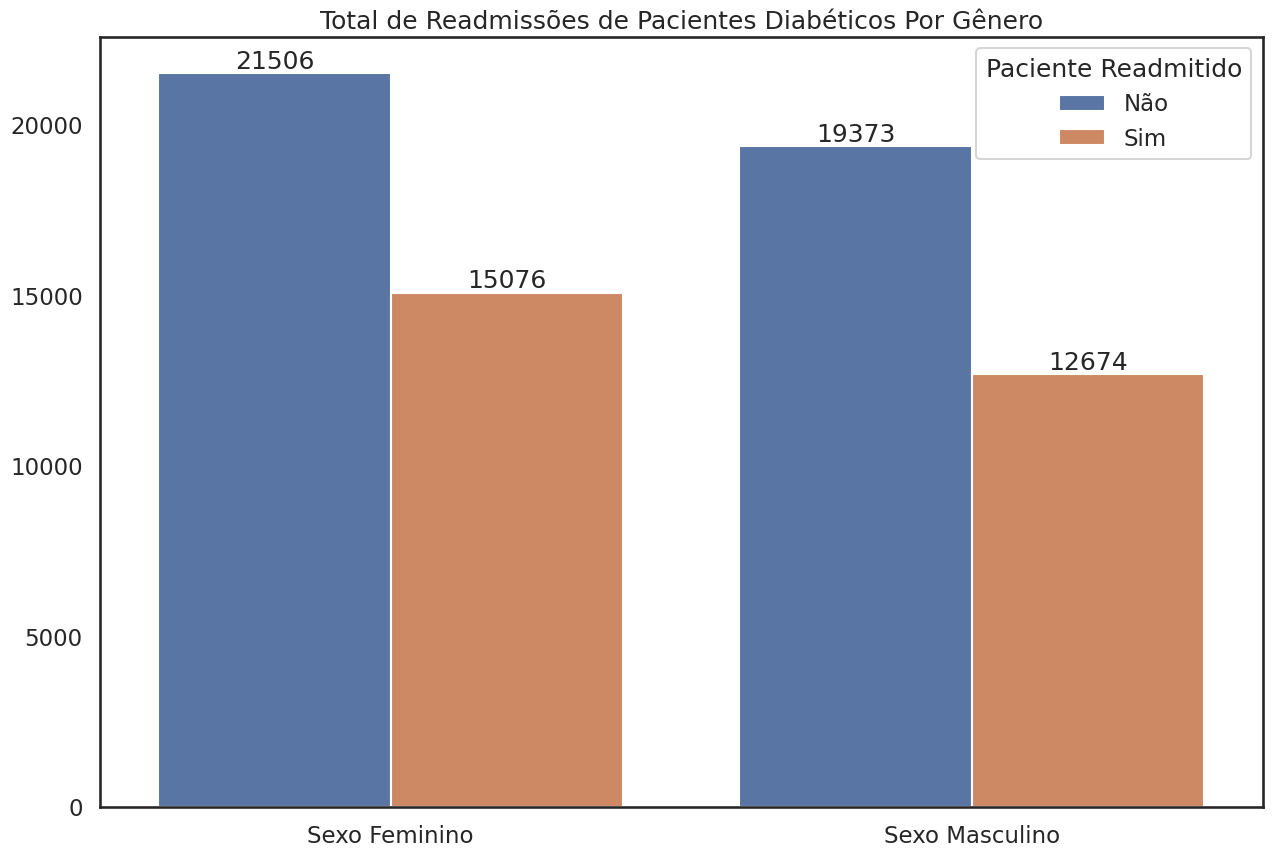

In [ ]:
# gráfico de barras com label encoding
figx = sns.countplot(x = [('Sexo Feminino' if x == 0 else 'Sexo Masculino') for x in dados['gender']],
                     hue = 'readmitted',
                     data = dados)

figx.figure.set_size_inches(15,10)

figx.legend(title = 'Paciente Readmitido', labels = ('Não', 'Sim'))

plt.ylabel("")
figx.axes.set_title('Total de Readmissões de Pacientes Diabéticos Por Gênero')

for p in figx.patches:
    figx.annotate('{:.0f}'.format(p.get_height()),
                  (p.get_x() + 0.2, p.get_height()),
                  ha = 'center',
                  va = 'bottom')

plt.show()

> Pacientes do sexo feminino tem número maior de readmissões.

#### Total de Readmissões de Pacientes Por Faixa Etária

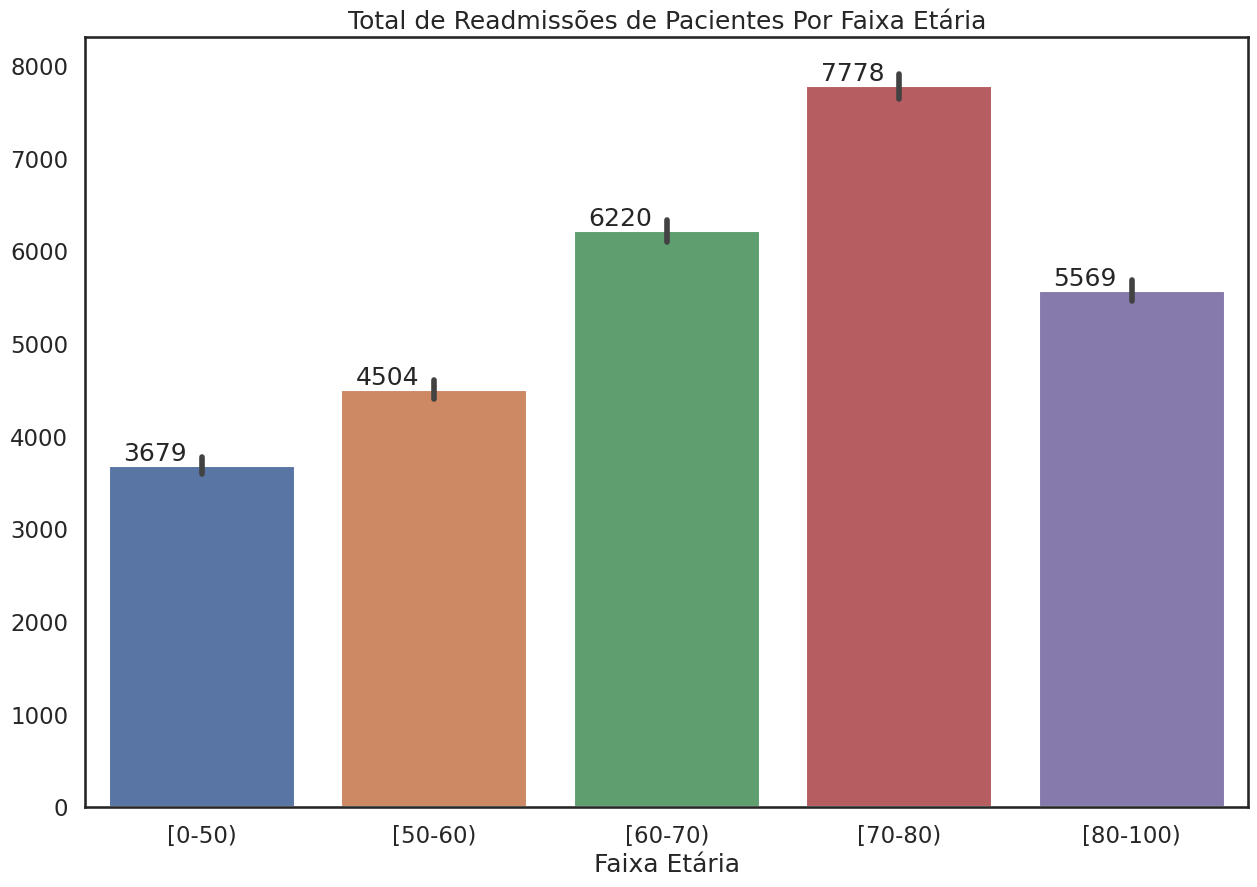

In [ ]:
figx = sns.barplot(x = 'age', y = 'readmitted', estimator = np.sum, data = dados)

figx.figure.set_size_inches(15,10)

plt.xlabel("Faixa Etária")
plt.ylabel("")
plt.title("Total de Readmissões de Pacientes Por Faixa Etária")

# totais em cada uma das barras como labels
for p in figx.patches:
    figx.annotate('{:.0f}'.format(p.get_height()),
                  (p.get_x() + 0.2, p.get_height()),
                  ha = 'center',
                  va = 'bottom')

plt.show()

> A faixa etária de pacientes entre 70-80 é a que tem o maior número de readmissões.

#### Percentual de Readmissões/Não Readmissões de Pacientes Por Faixa Etária

In [ ]:
# Calculando os percentuais
percentual_idade_readmissao = pd.crosstab(dados.age , dados.readmitted, margins = True, normalize = 'index') * 100
percentual_idade_readmissao

readmitted,0,1
age,,
[0-50),64.915125,35.084875
[50-60),62.463539,37.536461
[60-70),59.647074,40.352926
[70-80),55.912028,44.087972
[80-100),57.449572,42.550428
All,59.565198,40.434802


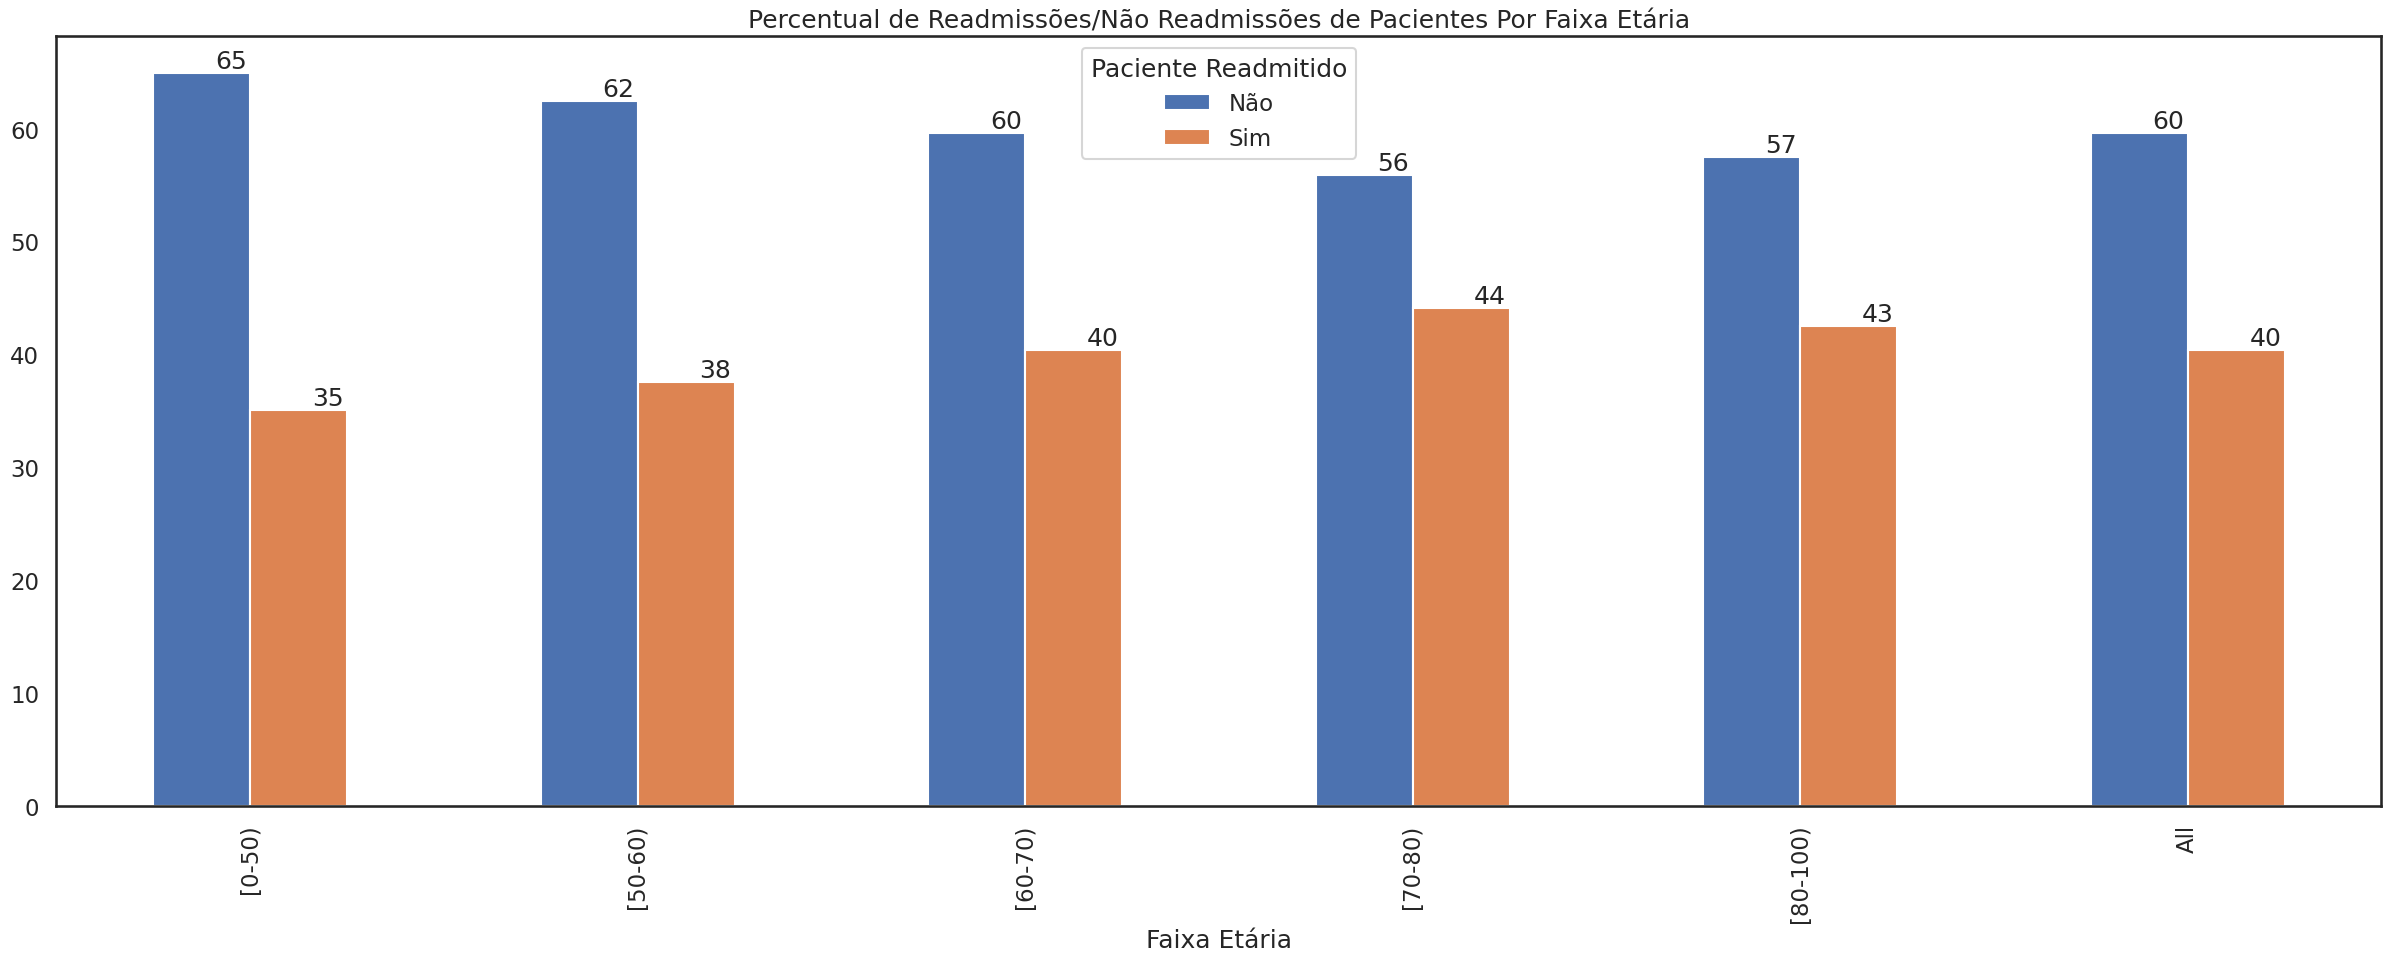

In [ ]:
# Plot
fig = percentual_idade_readmissao.plot(kind = 'bar',
                                       figsize = (30, 10),
                                       width = 0.5)

plt.legend(title = 'Paciente Readmitido', labels = ('Não', 'Sim'))

plt.xlabel("Faixa Etária")
plt.ylabel("")
plt.title("Percentual de Readmissões/Não Readmissões de Pacientes Por Faixa Etária")

for p in fig.patches:
    fig.annotate('{:.0f}'.format(p.get_height()),
                 (p.get_x() + 0.2, p.get_height()),
                 ha = 'center',
                 va = 'bottom')

plt.show()

> A faixa etária de pacientes entre 70-80 tem o maior percentual de readmissões, enquanto a faixa etária de 0-50 anos tem o menor percentual.

#### Total de Readmissões de Pacientes Por Gênero, Por Idade e Por Tipo de Admissão

<ipython-input-110-cf7011353124>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x = 'age',


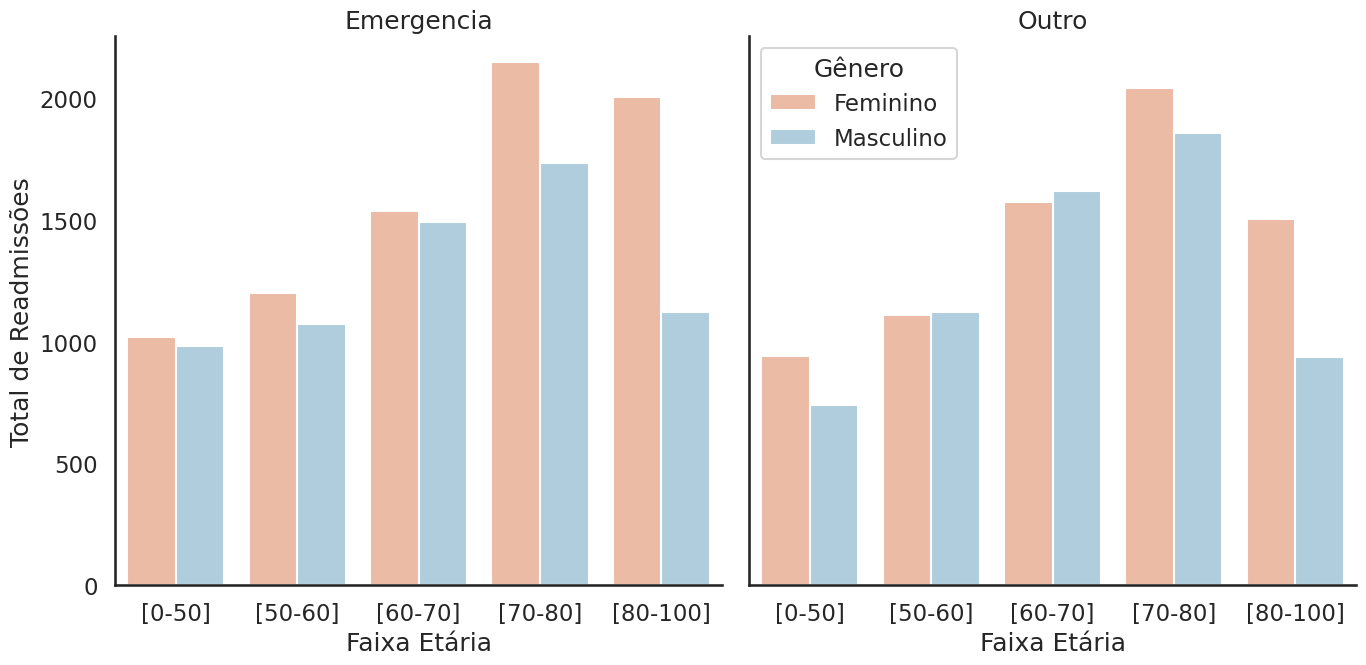

In [ ]:
# background
sns.set(style = "white", context = "talk")

g = sns.catplot(x = 'age',
                y = 'readmitted',
                hue = 'gender',
                col = 'admission_type_id',
                estimator = np.sum,
                data = dados,
                palette = "RdBu",
                kind = "bar",
                height = 7,
                aspect = 1,
                legend = False,
                ci = None)

(g.set_axis_labels("Faixa Etária", "Total de Readmissões")
 .set_xticklabels(["[0-50]", "[50-60]", "[60-70]", "[70-80]", "[80-100]"])
 .set_titles("{col_name}"))

plt.legend(title = 'Gênero', loc = 'upper left', labels = ['Feminino', 'Masculino'])

plt.show(g)

> Mulheres na faixa etária de 70-80 anos tem um número maior de readmissões por emergência.

#### Total de Readmissões/Não Readmissões Por Gênero e Por Etnia

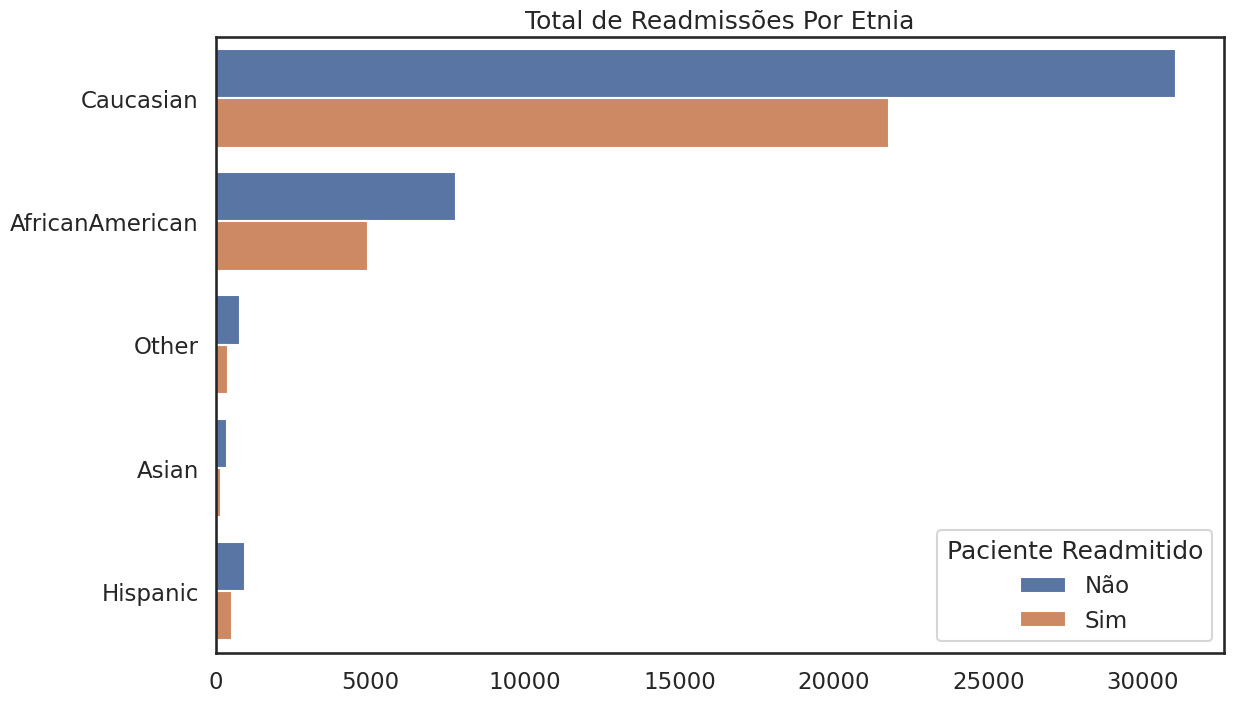

In [ ]:
figx = sns.countplot(y = 'race', hue = 'readmitted', data = dados)

plt.xlabel("")
plt.ylabel("")

figx.figure.set_size_inches(13, 8)

figx.legend(title = 'Paciente Readmitido', labels = ('Não', 'Sim'))
figx.axes.set_title('Total de Readmissões Por Etnia')

plt.show()

In [ ]:
# Valores únicos de etnia
dados['race'].unique()

array(['Caucasian', 'AfricanAmerican', 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [ ]:
# Criando um dataframe temporário para ajustar o label da variável target para o plot
df_temp = dados

In [ ]:
# mapeamento de 0 e 1 para labels (para colocar no título)
df_temp["readmitted"] = df_temp["readmitted"].map({0: "Não Readmitido", 1: "Readmitido"})

In [ ]:
df_temp['readmitted'].head(10)

0        Readmitido
1    Não Readmitido
2    Não Readmitido
3    Não Readmitido
4        Readmitido
5    Não Readmitido
6        Readmitido
7    Não Readmitido
8    Não Readmitido
9        Readmitido
Name: readmitted, dtype: object

In [ ]:
df_temp.head(10)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
0,149190,55629189,Caucasian,0,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,...,0,9,-99,-99,1,1,Readmitido,1,1,1
1,64410,86047875,AfricanAmerican,0,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,...,1,6,-99,-99,0,1,Não Readmitido,1,0,1
2,500364,82442376,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,...,0,7,-99,-99,1,1,Não Readmitido,3,1,1
3,16680,42519267,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,...,0,5,-99,-99,1,1,Não Readmitido,1,0,2
4,35754,82637451,Caucasian,1,[50-60),Outro,Casa,Outro,3,31,...,0,9,-99,-99,0,1,Readmitido,3,0,1
5,55842,84259809,Caucasian,1,[60-70),Outro,Casa,Outro,4,70,...,0,7,-99,-99,1,1,Não Readmitido,2,0,3
6,63768,114882984,Caucasian,1,[70-80),Emergencia,Casa,Sala_Emergencia,5,73,...,0,8,-99,-99,0,1,Readmitido,3,0,1
7,12522,48330783,Caucasian,0,[80-100),Outro,Casa,Outro,13,68,...,0,8,-99,-99,1,1,Não Readmitido,2,0,2
8,15738,63555939,Caucasian,0,[80-100),Outro,Outro,Outro,12,33,...,0,8,-99,-99,1,1,Não Readmitido,2,0,2
9,28236,89869032,AfricanAmerican,0,[0-50),Emergencia,Casa,Sala_Emergencia,9,47,...,0,9,-99,-99,0,1,Readmitido,3,0,1


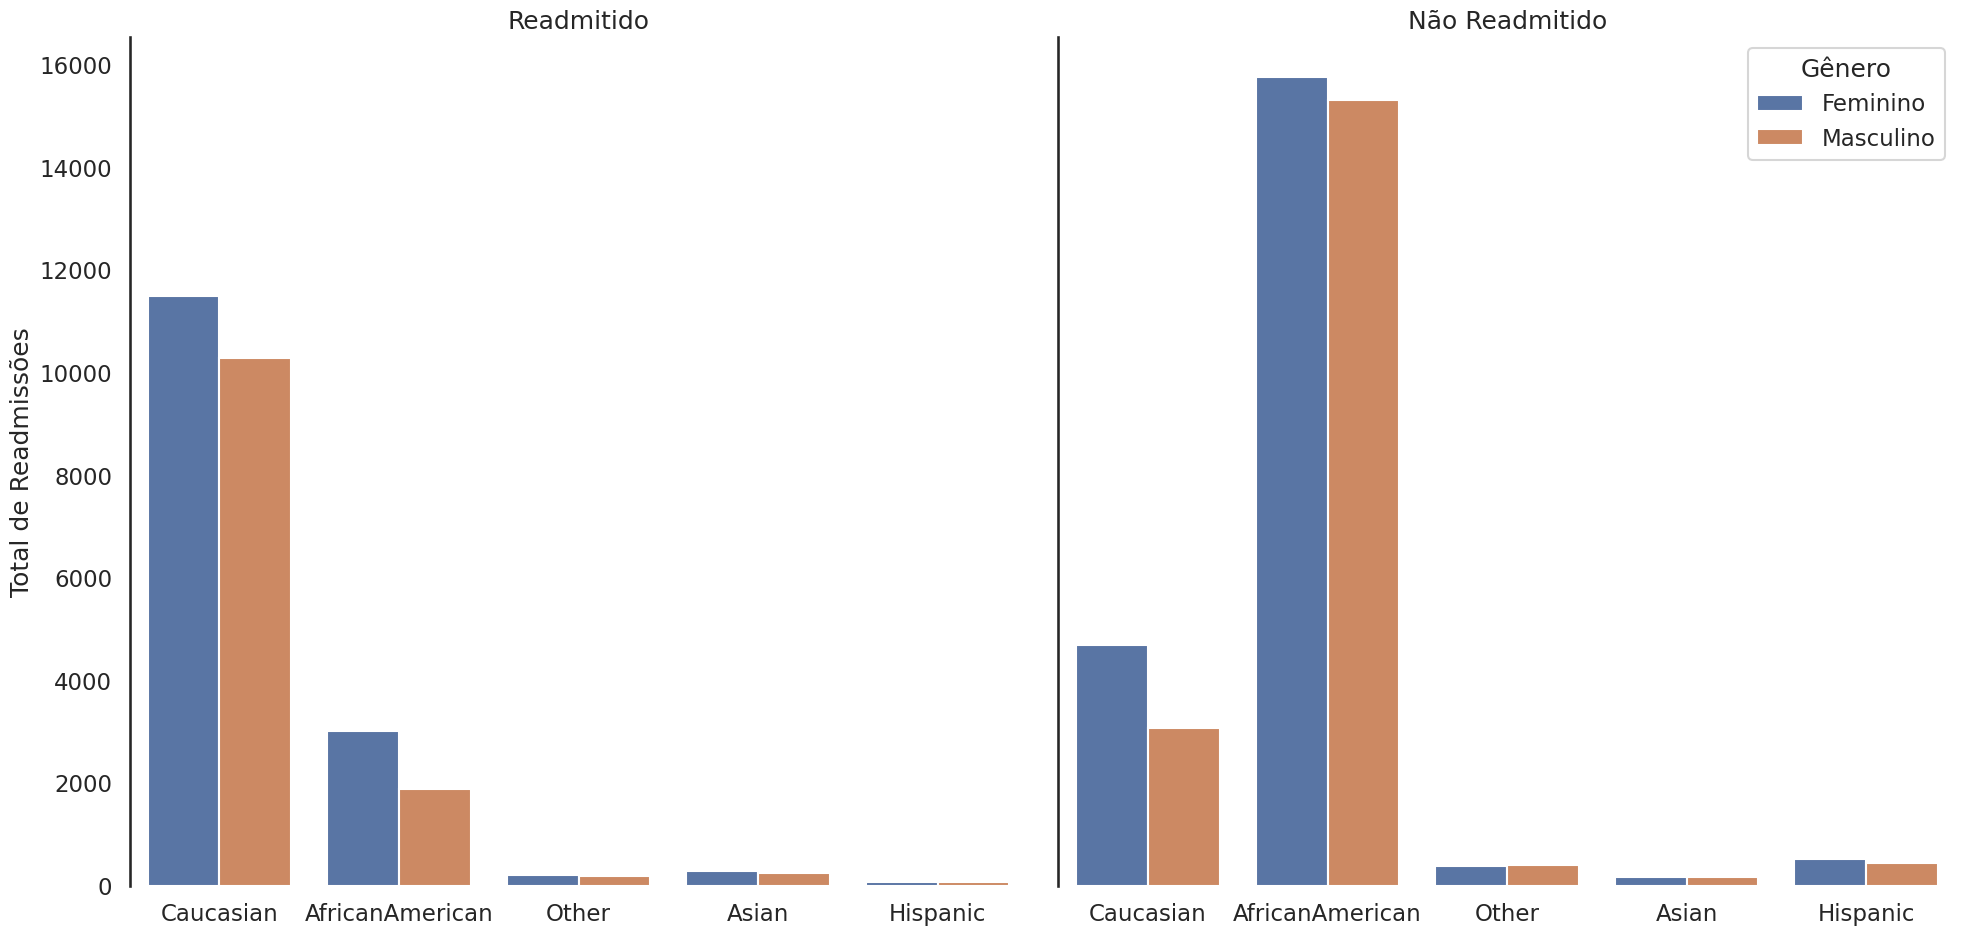

In [ ]:
sns.set(style = "white", context = "talk")

# função para personalizar a quantidade de parâmetros
def countplot(x, hue, **kwargs):
    sns.countplot(x = x, hue = hue, **kwargs)

# facetgrid (usando o dataframe temporário)
grid = sns.FacetGrid(data = df_temp, col = 'readmitted', height = 10, aspect = 1)

# Mapeamento do facetgrid às variáveis
fig = grid.map(countplot, 'race', 'gender', palette = 'deep')

# Labels
(fig.set_axis_labels("", "Total de Readmissões")
 .set_xticklabels(["Caucasian", "AfricanAmerican", "Other", "Asian", "Hispanic"])
 .set_titles('{col_name}'))

plt.legend(title = 'Gênero', loc = 'upper right', labels = ['Feminino', 'Masculino'])

# Remove os contornos do gráfico
sns.despine(bottom = True)

> Mulheres Caucasianas são a maioria entre as mulheres readmitidas.


#### Número de Visitas x Comorbidade

In [ ]:
# tabela de contigência
num_visitas_comorbidade = pd.crosstab(dados.number_inpatient, dados.comorbidade).sum()
num_visitas_comorbidade

comorbidade
0    15483
1    13032
2    27076
3    13038
dtype: int64

In [ ]:
# Tipo
type(num_visitas_comorbidade)

pandas.core.series.Series

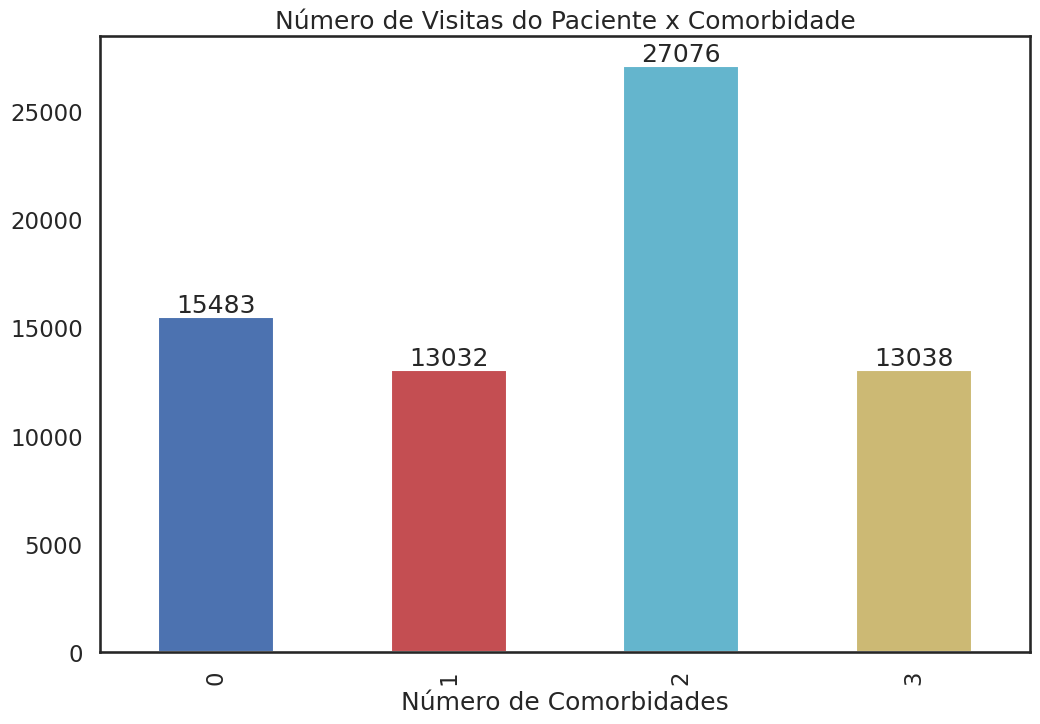

In [ ]:
sns.set(style = "white", context = "talk")

fig = num_visitas_comorbidade.plot(kind = 'bar',
                                   figsize = (12,8),
                                   width = 0.5,
                                   color = ['b','r','c','y'],
                                   rot = 90)

# Coloca os totais em cada uma das barras como labels
for p in fig.patches:
    fig.annotate('{:.0f}'.format(p.get_height()),
                 (p.get_x() + 0.25, p.get_height()),
                 ha = 'center',
                 va = 'bottom')

plt.title("Número de Visitas do Paciente x Comorbidade")
plt.xlabel("Número de Comorbidades")
plt.ylabel("")

plt.show()

>Pacientes com comorbidade tem o maior número de visitas.

#### Proporção de Readmissões Pelo Número de Visitas Antes da Alta

In [ ]:
# Tabela de contingência
percent_visitas_readm = pd.crosstab(dados.number_inpatient, dados.readmitted, normalize = 'index') * 100
percent_visitas_readm

readmitted,Não Readmitido,Readmitido
number_inpatient,,
0,62.088788,37.911212
1,45.879397,54.120603
2,34.692557,65.307443
3,29.363450,70.636550
4,24.137931,75.862069
5,20.388350,79.611650
6,12.500000,87.500000
7,10.000000,90.000000
8,16.666667,83.333333


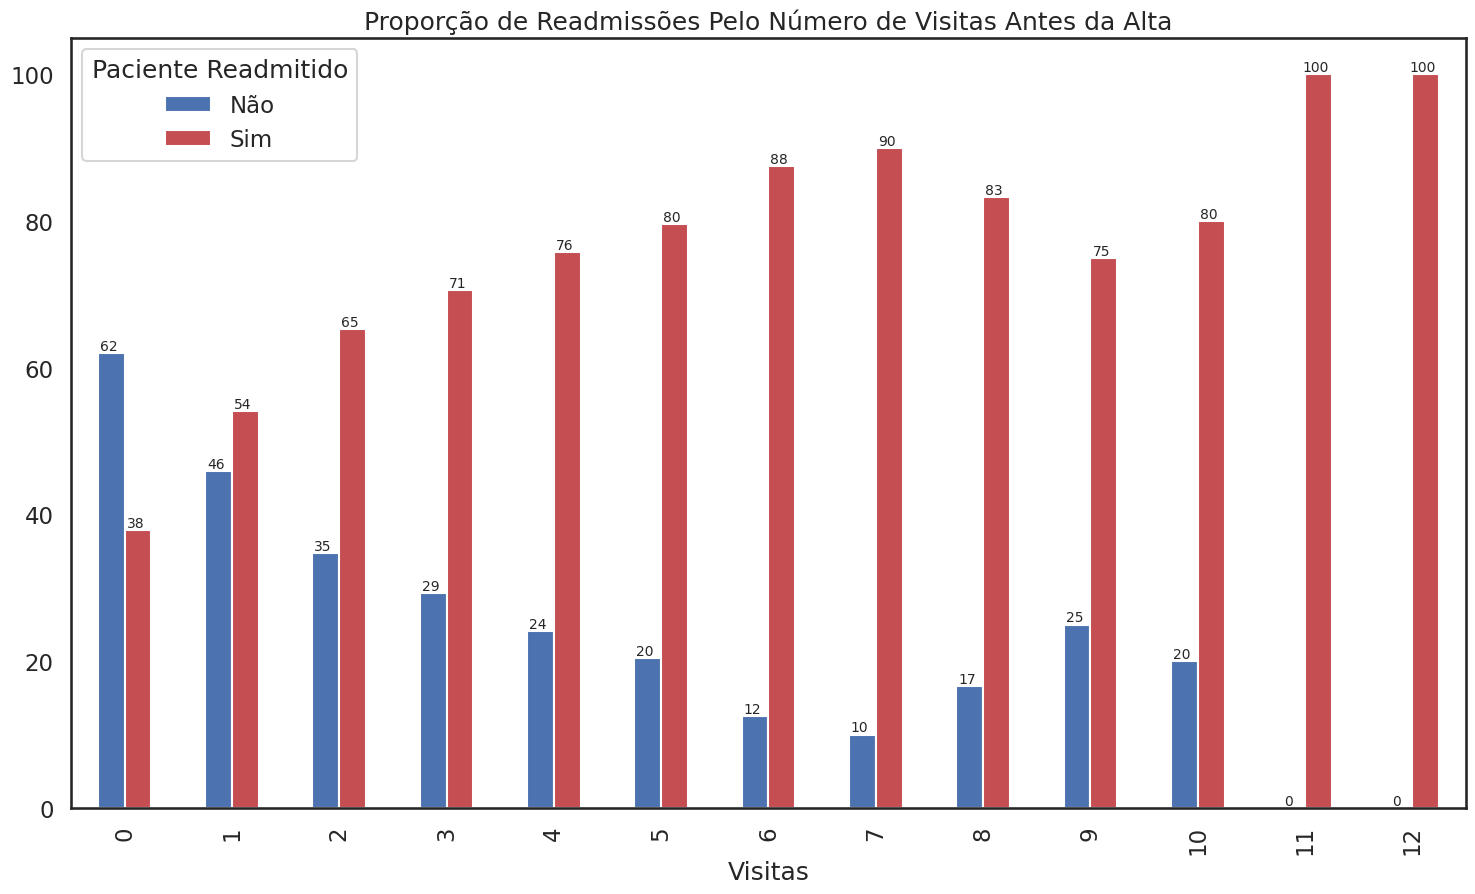

In [ ]:
fig = percent_visitas_readm.plot(kind = 'bar', figsize = (18,10), width = 0.5, color = ['b','r'])

# Coloca os totais em cada uma das barras como labels
for p in fig.patches:
    fig.annotate('{:.0f}'.format(p.get_height()),
                 (p.get_x() + 0.1, p.get_height()),
                 ha = 'center',
                 va = 'bottom',
                 size = 10)

plt.title("Proporção de Readmissões Pelo Número de Visitas Antes da Alta")
plt.xlabel("Visitas")
plt.ylabel("")

fig.legend(title = 'Paciente Readmitido', labels = ('Não', 'Sim'))

plt.show()

> Quanto mais visitas o paciente recebeu antes da alta, maior foi o volume de readmissões. Ou seja, quanto mais visitas o paciente recebe, maiores as chances de readmissão.

#### Gráficos Estatísticos

<ipython-input-123-0a95a0c93034>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dados['num_medications'], hist = True, color = 'Blue', axlabel = "Número de Medicamentos Consumidos")


<Axes: xlabel='Número de Medicamentos Consumidos', ylabel='Density'>

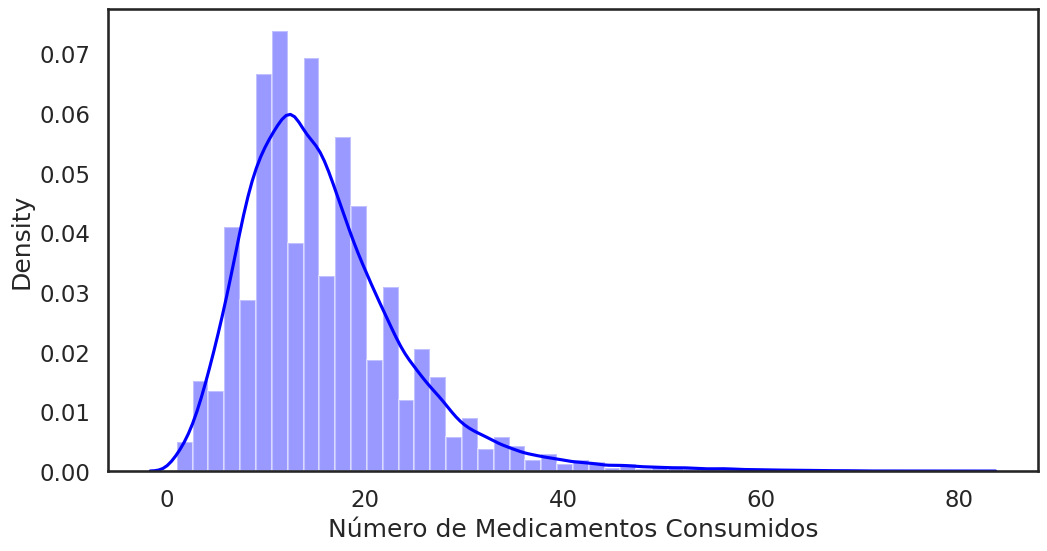

In [ ]:
plt.figure(figsize = (12,6))

sns.distplot(dados['num_medications'], hist = True, color = 'Blue', axlabel = "Número de Medicamentos Consumidos")

In [ ]:
# Estatísticas
dados['num_medications'].describe()

count    68629.000000
mean        15.806481
std          8.289790
min          1.000000
25%         10.000000
50%         14.000000
75%         20.000000
max         81.000000
Name: num_medications, dtype: float64

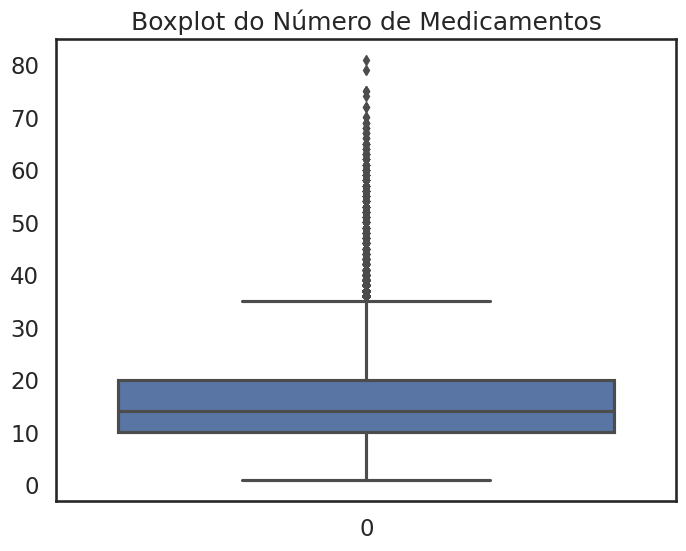

In [ ]:
plt.figure(figsize = (8,6))

sns.boxplot(dados['num_medications'])

plt.title("Boxplot do Número de Medicamentos")

plt.show()

#### Histogramas do número de medicamentos e diagnósticos

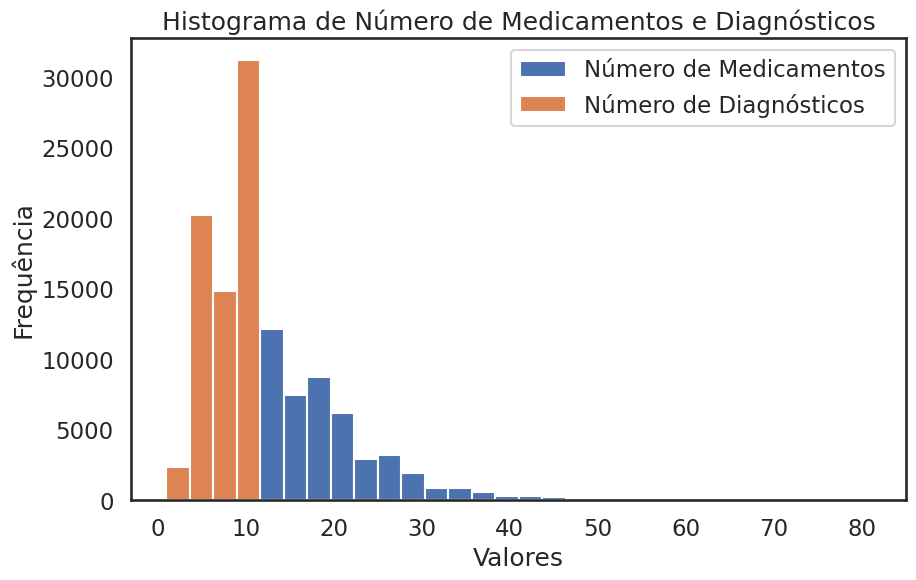

In [ ]:
# Dois histogramas para duas variáveis no mesmo gráfico - Stacked Histogramas
dados[["num_medications", "number_diagnoses"]].plot(bins = 30, kind = "hist", figsize = (10,6))

plt.legend(labels=["Número de Medicamentos", "Número de Diagnósticos"])

plt.title("Histograma de Número de Medicamentos e Diagnósticos")
plt.xlabel("Valores")
plt.ylabel("Frequência")

plt.show()

#### Histogramas do número de medicamentos baseado na readmissão

array([<Axes: title={'center': 'Não Readmitido'}>,
       <Axes: title={'center': 'Readmitido'}>], dtype=object)

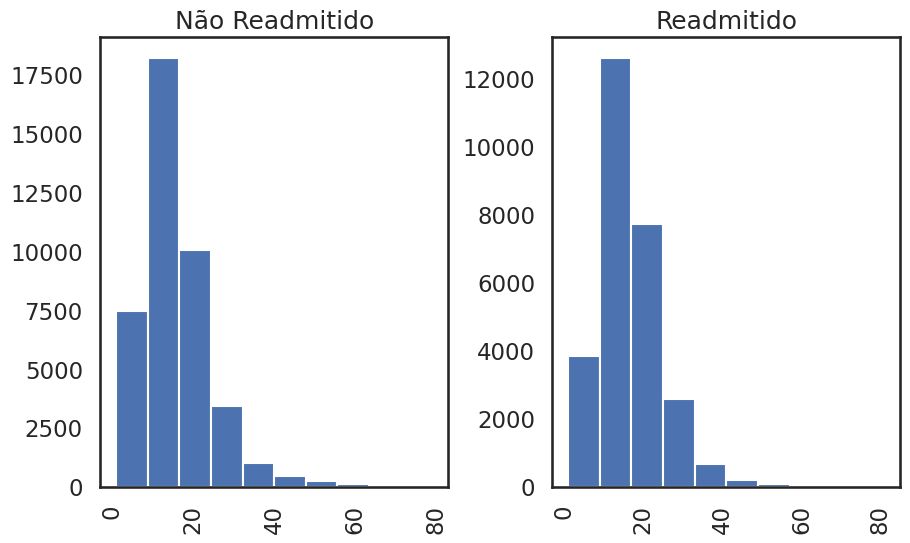

In [ ]:
# Histogramas da Mesma Variável Por Diferentes Classes
dados[["num_medications"]].hist(by = dados.readmitted, figsize = (10,6))

Durante nossa análise com Python e Power BI (veja os dashboards abaixo), identificamos padrões interessantes. Por exemplo, observamos que mulheres caucasianas, com idades entre 70 e 80 anos e que possuíam mais de uma comorbidade, apresentaram uma probabilidade maior de readmissão hospitalar. Por outro lado, notamos que homens asiáticos, com idades entre 50 e 60 anos e até uma comorbidade, parecem ter uma probabilidade menor de readmissão dentro desse grupo específico de pacientes diabéticos.

## Dashboards do Power BI

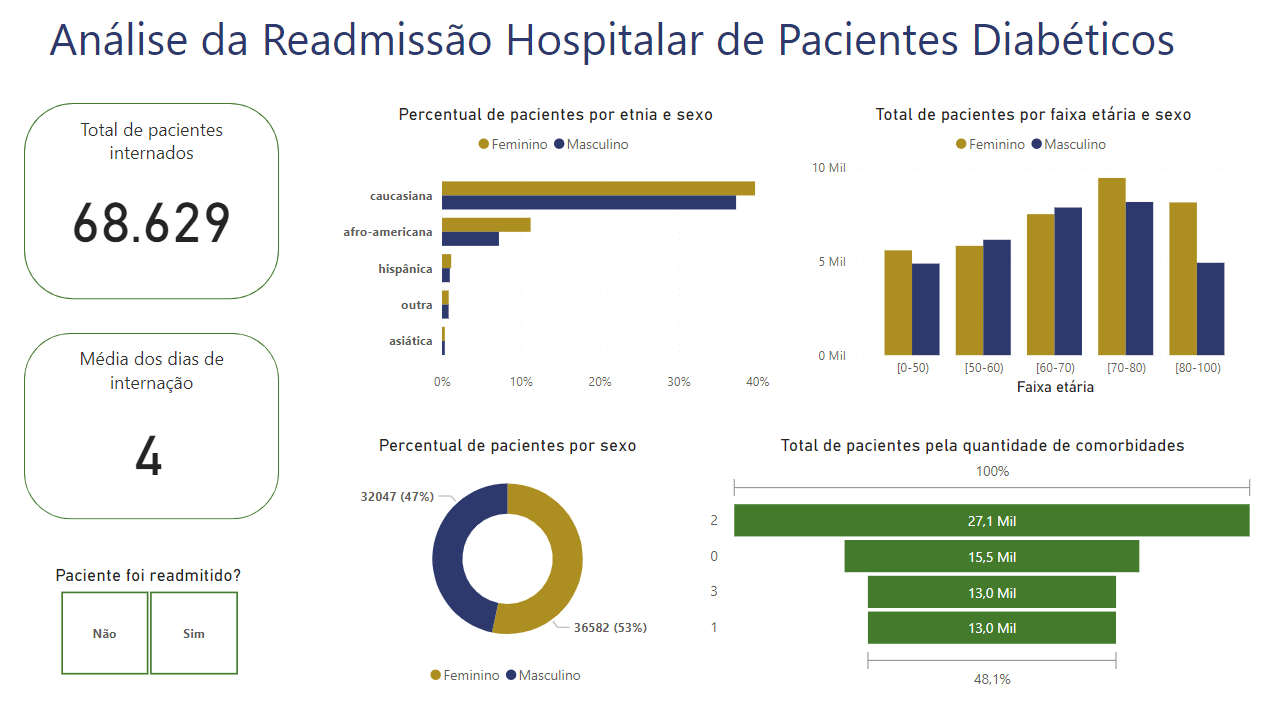

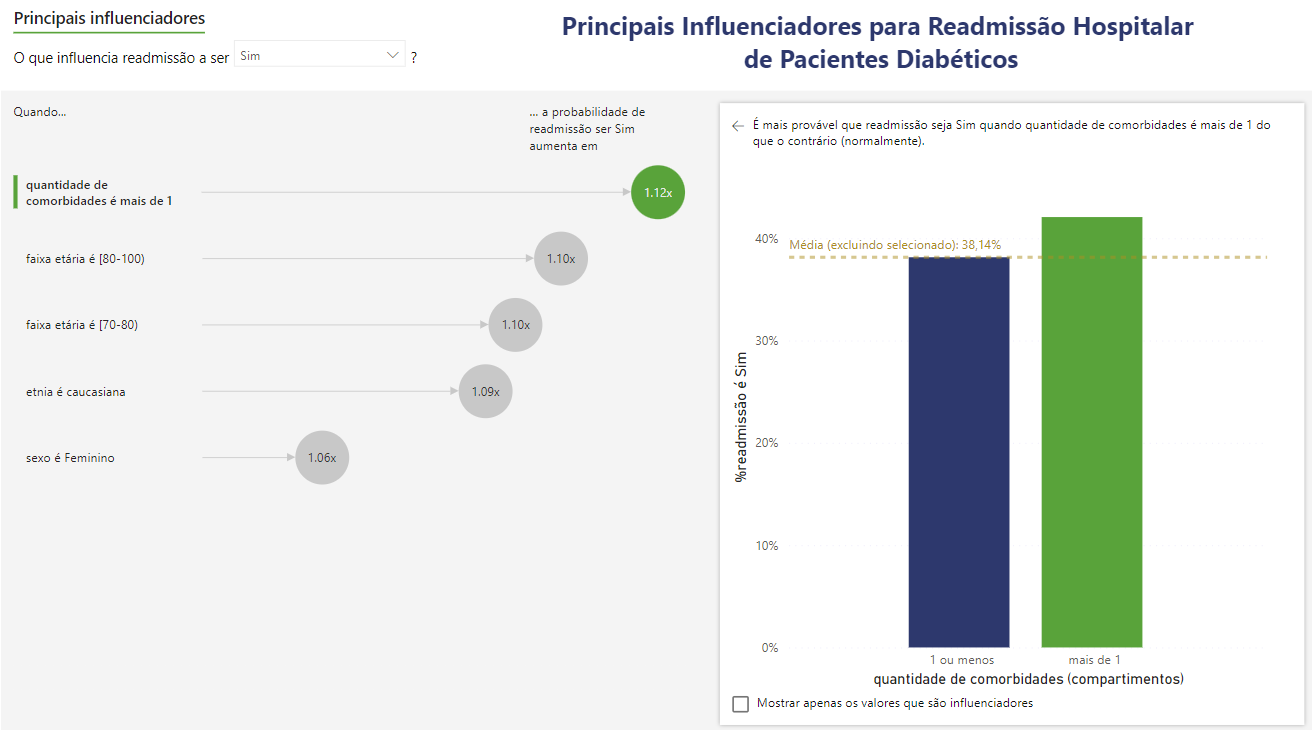